<a href="https://colab.research.google.com/github/bharath-r17/tamil-vowel-cassification/blob/main/tamil_vowels.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# Jovian Commit Essentials
# Please retain and execute this cell without modifying the contents for `jovian.commit` to work
!pip install jovian --upgrade -q
import jovian
jovian.set_project('tamil-vowels')
jovian.set_colab_id('1OAIbMiNPM7WY09dqSLZbiMtmAWKar2up')

     |████████████████████████████████| 71kB 3.8MB/s 


# tamil-vowels

Use the "Run" button to execute the code.

In [3]:
!pip install jovian --upgrade --quiet

In [6]:
import jovian

In [7]:
# Execute this to save new versions of the notebook
jovian.commit(project="tamil-vowels")

[jovian] Detected Colab notebook...
[jovian] Please enter your API key ( from https://jovian.ai/ ):
API KEY: ··········
[jovian] Uploading colab notebook to Jovian...
[jovian] Capturing environment..
[jovian] Committed successfully! https://jovian.ai/br17062000/tamil-vowels


'https://jovian.ai/br17062000/tamil-vowels'

In [8]:
import os
import torch
import torchvision
import tarfile
import torch.nn as nn
import numpy as np
import torch.nn.functional as F
from torchvision.datasets.utils import download_url
from torchvision.datasets import ImageFolder
import torchvision.transforms as tt
from torch.utils.data import random_split
from torchvision.utils import make_grid
import matplotlib
import matplotlib.pyplot as plt
from PIL import Image as im
from torch.utils.data import DataLoader, TensorDataset, random_split
from sklearn.preprocessing import OneHotEncoder

%matplotlib inline
matplotlib.rcParams['figure.facecolor'] = '#ffffff'

In [9]:
pip install opendatasets --upgrade


In [10]:
import opendatasets as od
dataset_url = 'https://www.kaggle.com/muthua/tamil-vowels-image-dataset/download'
od.download(dataset_url)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: bharathr17
Your Kaggle Key: ··········


100%|██████████| 2.71M/2.71M [00:00<00:00, 186MB/s]

In [11]:
data_dir = '/content/tamil-vowels-image-dataset'
print(os.listdir(data_dir))

['train-image-1591211703.9039922.npy', 'tamil-uyir-letters-MA-0427-2020-USLetter.png', 'train-label-1591211706.368335-onehot.npy']


In [12]:
basepath = data_dir
for entry in os.listdir(basepath):
    if os.path.isfile(os.path.join(basepath, entry)):
        if entry == 'train-label-1591211706.368335-onehot.npy':
          labels_path = entry
        if entry == 'train-image-1591211703.9039922.npy':
          images_path = entry  
      

In [13]:
cd /content/tamil-vowels-image-dataset

/content/tamil-vowels-image-dataset


In [14]:
labels =np.load(labels_path)
images = np.load(images_path)

In [15]:
def get_rows():
      keep_rows = []
      for i in range(images.shape[0]):
          img = images[i,:].reshape(28,28)
          hasTopFilled=any(img[0,:])
          hasBotFilled=any(img[27,:])
          hasLeftFilled=any(img[:,0])
          hasRightFilled=any(img[:,27])
          if sum([hasBotFilled, hasTopFilled, hasLeftFilled, hasRightFilled]) < 2:
              keep_rows.append(i)
      return labels[keep_rows,:],images[keep_rows,:]

In [16]:
in_labels, in_images = get_rows()

In [17]:
num = 29990
array = np.reshape(in_images[num], (28, 28))
data = im.fromarray(array)
data.save('gfg_dummy_pic.png')

print('label: ', in_labels[num])
data

label:  [0 0 0 1 0 0 0 0 0 0 0 0 0]


In [18]:
convertedImages = in_images.astype('float32')
convertedImages = convertedImages/255

In [19]:

convertedImages[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [20]:
inputs = torch.from_numpy(convertedImages)
targets = torch.tensor(in_labels, dtype=torch.long)

In [23]:
jovian.commit(project="tamil-vowels")


[jovian] Detected Colab notebook...
[jovian] Uploading colab notebook to Jovian...
[jovian] Capturing environment..
[jovian] Committed successfully! https://jovian.ai/br17062000/tamil-vowels


'https://jovian.ai/br17062000/tamil-vowels'

In [24]:
labels1 = [[0],[1],[2],[3],[4],[5],[6],[7],[8],[9],[10],[11],[12]]
enc = OneHotEncoder()
encoder = enc.fit(labels1)
decoded_labels = encoder.inverse_transform(targets)
decoded_labels = np.concatenate(decoded_labels)
decoded_labels

array([ 5,  6,  3, ..., 10,  3,  6])

In [25]:
targets = torch.tensor(decoded_labels, dtype=torch.long)
targets.shape

torch.Size([34890])

In [26]:
dataset = TensorDataset(inputs,targets)
train_ds, val_ds = random_split(dataset, [27912,6978])
val_ds, test_ds = random_split(val_ds,[5233,1745])

In [27]:
batch_size = 128
train_dl = DataLoader(train_ds, batch_size, shuffle=True, num_workers=3, pin_memory=True)
valid_dl = DataLoader(val_ds, batch_size*2, num_workers=3, pin_memory=True)
test_dl = DataLoader(test_ds, batch_size*2, num_workers=3, pin_memory=True)



/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:477: UserWarning: This DataLoader will create 3 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


In [28]:
def get_default_device():
    """Pick GPU if available, else CPU"""
    if torch.cuda.is_available():
        return torch.device('cuda')
    else:
        return torch.device('cpu')

In [29]:
device = get_default_device()
device

device(type='cuda')

In [30]:
def to_device(data, device):
    """Move tensor(s) to chosen device"""
    if isinstance(data, (list,tuple)):
        return [to_device(x, device) for x in data]
    return data.to(device, non_blocking=True)

In [31]:
class DeviceDataLoader():
    """Wrap a dataloader to move data to a device"""
    def __init__(self, dl, device):
        self.dl = dl
        self.device = device
        
    def __iter__(self):
        """Yield a batch of data after moving it to device"""
        for b in self.dl: 
            yield to_device(b, self.device)

    def __len__(self):
        """Number of batches"""
        return len(self.dl)

In [70]:
train_loader = DeviceDataLoader(train_dl, device)
val_loader = DeviceDataLoader(valid_dl, device)
test_loader = DeviceDataLoader(test_dl, device)

In [126]:
class TamilFfn(nn.Module):
    """Feedfoward neural network with 1 hidden layer"""
    def __init__(self, in_size, hidden_size, out_size):
        super().__init__()
        # hidden layer
        self.linear1 = nn.Linear(in_size, hidden_size)
        # output layer
        self.linear2 = nn.Linear(hidden_size, out_size)
        
    def forward(self, xb):
        # Flatten the image tensors
        xb = xb.view(xb.size(0), -1)
        # Get intermediate outputs using hidden layer
        out = self.linear1(xb)
        # Apply activation function
        out = F.relu(out)
        # Get predictions using output layer
        out = self.linear2(out)
        return out
    
    def training_step(self, batch):
        images, labels = batch 
        out = self(images)                  # Generate predictions
        loss = F.cross_entropy(out, labels) # Calculate loss
        return loss
    
    def validation_step(self, batch):
        images, labels = batch 
        out = self(images)                    # Generate predictions
        loss = F.cross_entropy(out, labels)   # Calculate loss
        acc = accuracy(out, labels)           # Calculate accuracy
        return {'val_loss': loss, 'val_acc': acc}
        
    def validation_epoch_end(self, outputs):
        batch_losses = [x['val_loss'] for x in outputs]
        epoch_loss = torch.stack(batch_losses).mean()   # Combine losses
        batch_accs = [x['val_acc'] for x in outputs]
        epoch_acc = torch.stack(batch_accs).mean()      # Combine accuracies
        return {'val_loss': epoch_loss.item(), 'val_acc': epoch_acc.item()}
    
    def epoch_end(self, epoch, result):
        print("Epoch [{}], val_loss: {:.4f}, val_acc: {:.4f}".format(epoch, result['val_loss'], result['val_acc']))

In [127]:

def accuracy(outputs, labels):
    _, preds = torch.max(outputs, dim=1)
    return torch.tensor(torch.sum(preds == labels.squeeze()).item() / len(preds))

def evaluate(model, val_loader):
    """Evaluate the model's performance on the validation set"""
    outputs = [model.validation_step(batch) for batch in val_loader]
    return model.validation_epoch_end(outputs)

def fit(epochs, lr, model, train_loader, val_loader, opt_func=torch.optim.SGD):
    """Train the model using gradient descent"""
    history = []
    optimizer = opt_func(model.parameters(), lr)
    for epoch in range(epochs):
        # Training Phase 
        for batch in train_loader:
            loss = model.training_step(batch)
            loss.backward()
            optimizer.step()
            optimizer.zero_grad()
        # Validation phase
        result = evaluate(model, val_loader)
        model.epoch_end(epoch, result)
        history.append(result)
    return history

In [128]:
input_size = 784
hidden_size = 32 # you can change this
num_classes = 13
model = TamilFfn(input_size, hidden_size=hidden_size, out_size=num_classes)
to_device(model, device)

TamilFfn(
  (linear1): Linear(in_features=784, out_features=32, bias=True)
  (linear2): Linear(in_features=32, out_features=13, bias=True)
)

In [129]:
history = [evaluate(model, val_loader)]
history

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:477: UserWarning: This DataLoader will create 3 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


[{'val_acc': 0.09895504266023636, 'val_loss': 2.567631483078003}]

In [130]:
history += fit(5, 0.5, model, train_loader, val_loader)

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:477: UserWarning: This DataLoader will create 3 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


Epoch [0], val_loss: 1.1268, val_acc: 0.6790
Epoch [1], val_loss: 1.4926, val_acc: 0.6351
Epoch [2], val_loss: 0.9813, val_acc: 0.6995
Epoch [3], val_loss: 1.9199, val_acc: 0.6299
Epoch [4], val_loss: 1.0709, val_acc: 0.6814


In [131]:

history += fit(10, 0.01, model, train_loader, val_loader)

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:477: UserWarning: This DataLoader will create 3 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


Epoch [0], val_loss: 0.4401, val_acc: 0.8508
Epoch [1], val_loss: 0.4303, val_acc: 0.8518
Epoch [2], val_loss: 0.4264, val_acc: 0.8525
Epoch [3], val_loss: 0.4238, val_acc: 0.8544
Epoch [4], val_loss: 0.4213, val_acc: 0.8576
Epoch [5], val_loss: 0.4208, val_acc: 0.8500
Epoch [6], val_loss: 0.4173, val_acc: 0.8578
Epoch [7], val_loss: 0.4159, val_acc: 0.8571
Epoch [8], val_loss: 0.4146, val_acc: 0.8566
Epoch [9], val_loss: 0.4133, val_acc: 0.8574


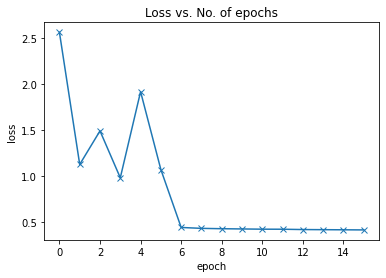

In [132]:
losses = [x['val_loss'] for x in history]
plt.plot(losses, '-x')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.title('Loss vs. No. of epochs');

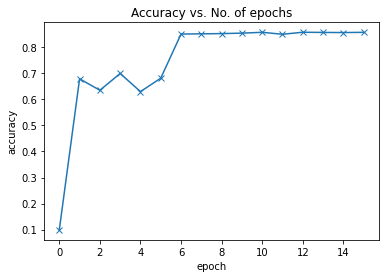

In [133]:
accuracies = [x['val_acc'] for x in history]
plt.plot(accuracies, '-x')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.title('Accuracy vs. No. of epochs');

# Testing 


In [134]:
evaluate(model, test_loader)

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:477: UserWarning: This DataLoader will create 3 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


{'val_acc': 0.8748478293418884, 'val_loss': 0.38858190178871155}

In [135]:
def predict_image(img, model):
    img = img.reshape(28,28)
    xb = to_device(img.unsqueeze(0), device)
    yb = model(xb)
    _, preds  = torch.max(yb, dim=1)
    return preds[0].item()


In [136]:
def letter(argument):
    switcher = {
        0: " அ ",
        1: " ஆ ",
        2: " இ ",
        3: " ஈ ",
        4: " உ ",
        5: " ஊ ",
        6:" எ ",
        7:" ஏ ",
        8:" ஐ ",
        9:" ஒ ",
        10:" ஓ ",
        11:" ஔ ",
        12:"ஃ "
    }
    return switcher.get(argument, "nothing")



In [137]:
img, label = test_ds[458]
print('Actual letter:', letter(label.item()), ', Predicted:', letter(predict_image(img, model)))
img = img.numpy()
img.shape
img = img.reshape(28,28)
img = img.astype(np.uint8)
img = img*255
data = im.fromarray(img)
data.save('predict.png')
data


Actual letter:  இ  , Predicted:  இ 


In [138]:
# Execute this to save new versions of the notebook

jovian.commit(project="tamil-vowels")

[jovian] Detected Colab notebook...
[jovian] Uploading colab notebook to Jovian...
[jovian] Capturing environment..
[jovian] Attaching records (metrics, hyperparameters, dataset etc.)
[jovian] Committed successfully! https://jovian.ai/br17062000/tamil-vowels


'https://jovian.ai/br17062000/tamil-vowels'

In [141]:
result = evaluate(model, test_loader)
result
jovian.log_metrics(test_loss=result['val_loss'], test_acc=result['val_acc'])
print(result)

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:477: UserWarning: This DataLoader will create 3 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


[jovian] Metrics logged.
{'val_loss': 0.38858190178871155, 'val_acc': 0.8748478293418884}


In [140]:
torch.save(model.state_dict(), 'tamil-vowels-forward.pth')